In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv ("Bank Customer Churn Prediction.csv")

# EDA

In [3]:
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

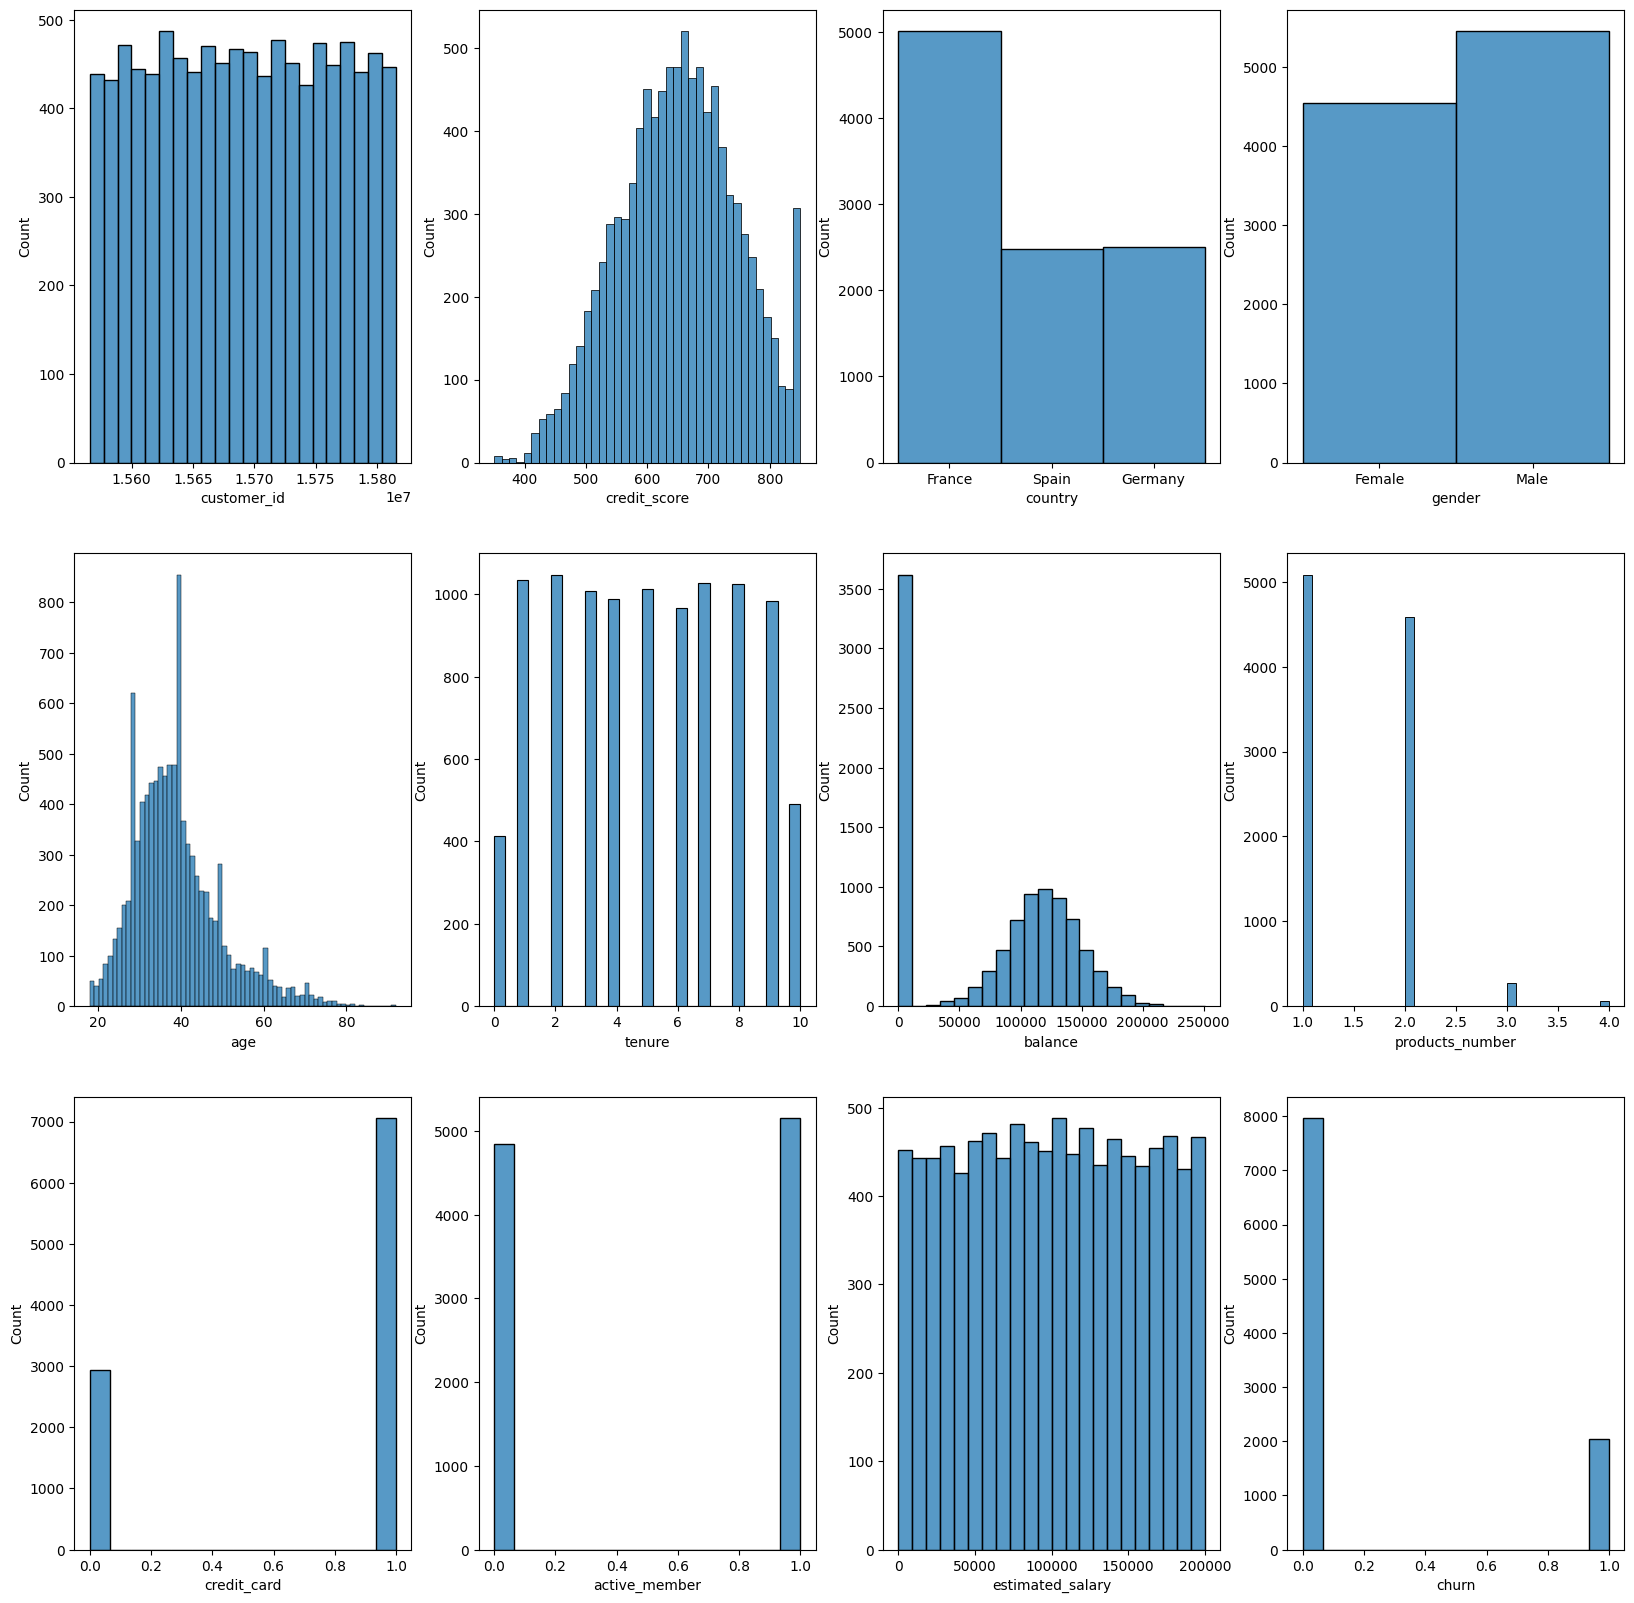

In [6]:
fig, ax = plt.subplots(3,4,figsize=(20,20))
ax = ax.flatten()

for i in range(0,len(df.columns)):
    sns.histplot(df.iloc[:,i], ax=ax[i])

plt.show()



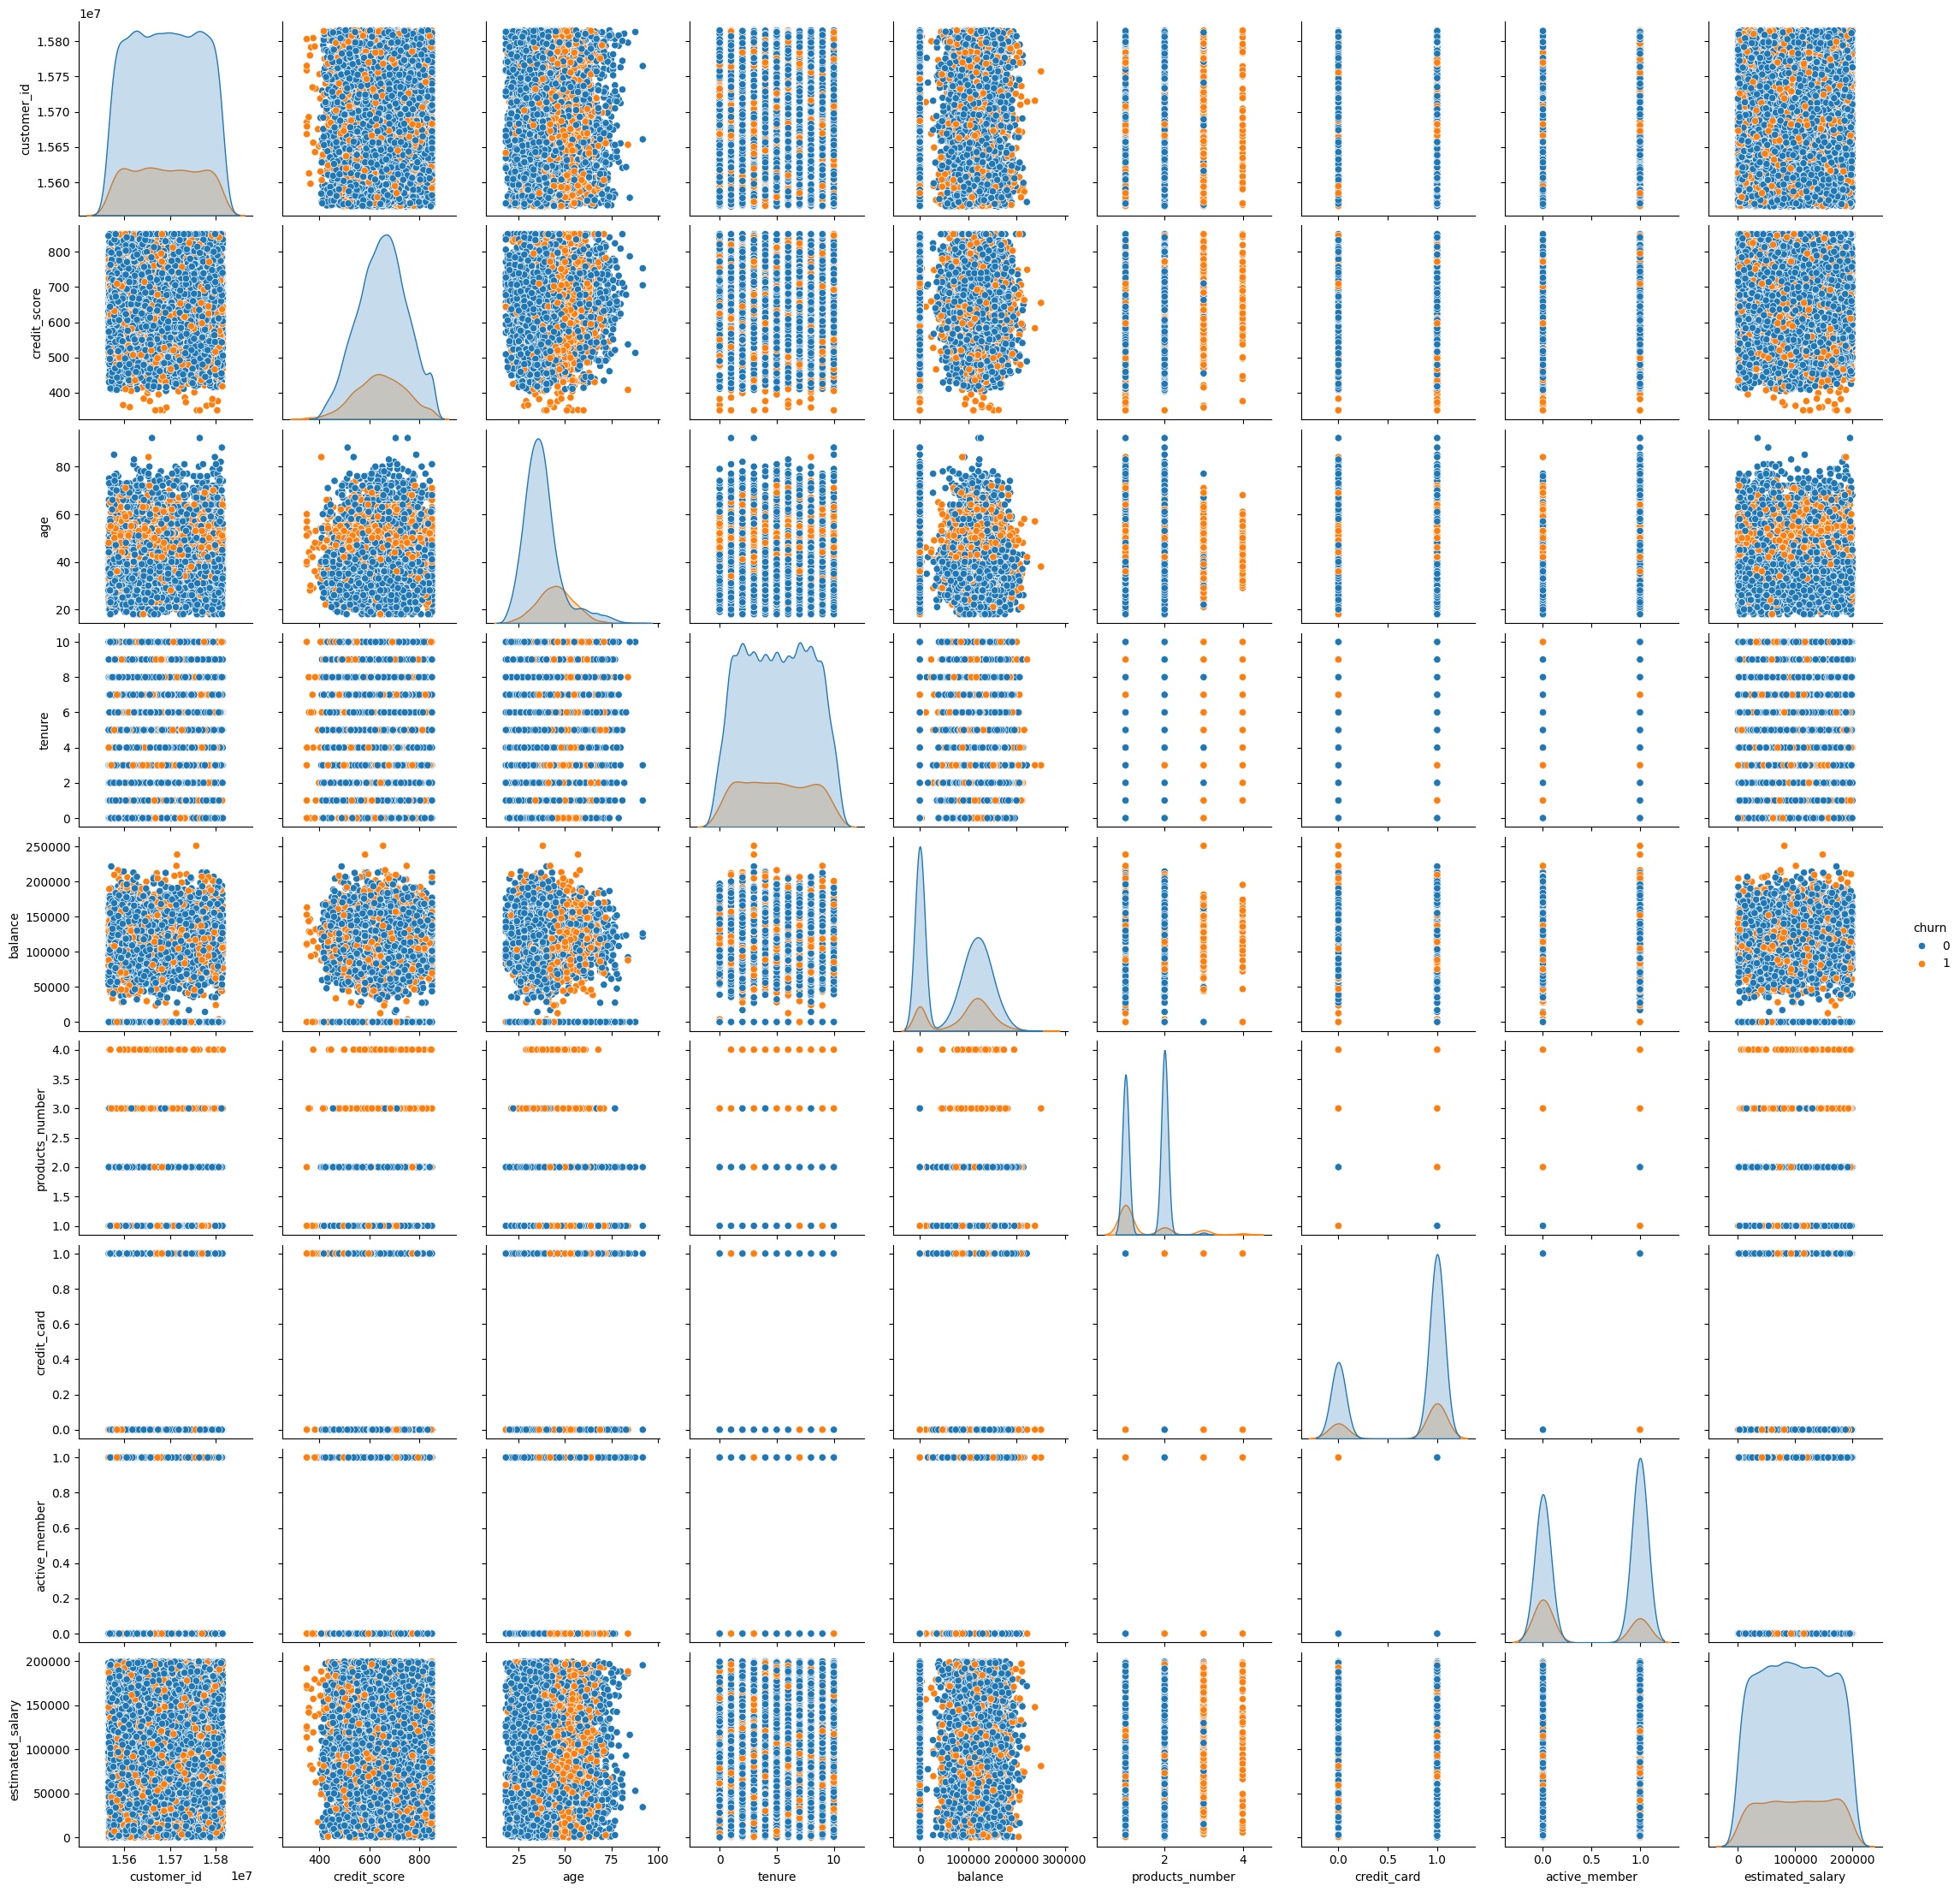

In [7]:
sns.pairplot(df,hue="churn")

# Preprocesamiento

## Dummies

In [8]:
X = df.drop(columns=["customer_id", "churn"])
y = df["churn"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [10]:
from sklearn.preprocessing import OneHotEncoder
objeto_dummies = OneHotEncoder(sparse_output=False, #por defecto el formato el formato es sparse
                               drop='first', # no creamos una nueva columna con la primera categoria que encuentra
                               handle_unknown='ignore') # ignora nuevas categorias en el test

In [11]:
objeto_dummies.fit(X_train[["country", "gender", "products_number", "tenure"]])
nombre_columnas= objeto_dummies.get_feature_names_out(["country", "gender", "products_number", "tenure"])
X_train[nombre_columnas] = objeto_dummies.transform(X_train[["country", "gender", "products_number", "tenure"]])


In [12]:
X_train = X_train.drop(columns=["country", "gender", "products_number", "tenure"])

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6700 entries, 8894 to 1184
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       6700 non-null   int64  
 1   age                6700 non-null   int64  
 2   balance            6700 non-null   float64
 3   credit_card        6700 non-null   int64  
 4   active_member      6700 non-null   int64  
 5   estimated_salary   6700 non-null   float64
 6   country_Germany    6700 non-null   float64
 7   country_Spain      6700 non-null   float64
 8   gender_Male        6700 non-null   float64
 9   products_number_2  6700 non-null   float64
 10  products_number_3  6700 non-null   float64
 11  products_number_4  6700 non-null   float64
 12  tenure_1           6700 non-null   float64
 13  tenure_2           6700 non-null   float64
 14  tenure_3           6700 non-null   float64
 15  tenure_4           6700 non-null   float64
 16  tenure_5           6700 no

In [14]:
X_test[nombre_columnas] = objeto_dummies.transform(X_test[["country", "gender", "products_number", "tenure"]])
X_test = X_test.drop(columns=["country", "gender", "products_number", "tenure"])

In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3300 entries, 4802 to 5757
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       3300 non-null   int64  
 1   age                3300 non-null   int64  
 2   balance            3300 non-null   float64
 3   credit_card        3300 non-null   int64  
 4   active_member      3300 non-null   int64  
 5   estimated_salary   3300 non-null   float64
 6   country_Germany    3300 non-null   float64
 7   country_Spain      3300 non-null   float64
 8   gender_Male        3300 non-null   float64
 9   products_number_2  3300 non-null   float64
 10  products_number_3  3300 non-null   float64
 11  products_number_4  3300 non-null   float64
 12  tenure_1           3300 non-null   float64
 13  tenure_2           3300 non-null   float64
 14  tenure_3           3300 non-null   float64
 15  tenure_4           3300 non-null   float64
 16  tenure_5           3300 no

In [16]:
X[nombre_columnas] = objeto_dummies.transform(X[["country", "gender", "products_number", "tenure"]])
X = X.drop(columns=["country", "gender", "products_number", "tenure"])

## Escalado

In [17]:
## Hay que escalar siempre en KNN, se escala la X, la y_train no se esacala

from sklearn.preprocessing import StandardScaler
objeto_escalador = StandardScaler()
objeto_escalador.fit(X_train) #solo escalamos el train, no el test
objeto_escalador.transform(X_train)
#X_train[:] = objeto_escalador.transform(X_train)
#X_test[:] = objeto_escalador.transform(X_test)
# otra forma de hacerlo sería:
X_train_scaled = pd.DataFrame(objeto_escalador.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(objeto_escalador.transform(X_test), columns=X_test.columns)

In [18]:
X_scaled = pd.DataFrame(objeto_escalador.transform(X), columns=X.columns)

# Modelos

## K-nearest neighbors (Knn)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model_KNN=KNeighborsClassifier()
model_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Escalado datos

Hecho en el preprocesamiento, X_train_scaled

In [24]:
params = {'n_neighbors' : [3,5,10,20,50]} # p es Power parameter for the Minkowski metric
scoring = ["accuracy", "roc_auc"]

n_cv = 5 #número de veces que hace split para cross validation
grid_solver = GridSearchCV(estimator=model_KNN, 
                           param_grid = params, 
                           scoring = scoring, 
                           cv=n_cv, 
                           refit="roc_auc", 
                           verbose=2)

model_KNN_result = grid_solver.fit(X_train_scaled, y_train)

print("Mejor score:", model_KNN_result.best_score_)
print("Mejores parámetros:", model_KNN_result.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................n_neighbors=3; total time=   0.4s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END .....................................n_neighbors=10; total time=   0.1s
[CV] END .....................................n_n

In [25]:
# prediccion de la y en el train
y_pred_train = model_KNN_result.predict(X_train_scaled)
probs_train = model_KNN_result.predict_proba(X_train_scaled)
print("Train score:", model_KNN_result.score(X_train_scaled, y_train))
print("Train AUC:", sklearn.metrics.roc_auc_score(y_train, probs_train[:,1]))
print("Train Accuracy:", sklearn.metrics.accuracy_score(y_train, y_pred_train))


# prediccion de la y en el test
y_pred_test = model_KNN_result.predict(X_test_scaled)
probs_test = model_KNN_result.predict_proba(X_test_scaled)
print("Test score:", model_KNN_result.score(X_test_scaled, y_test))
print("Train AUC:", sklearn.metrics.roc_auc_score(y_test, probs_test[:,1]))
print("Train Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred_test))

Train score: 0.8426499960520579
Train AUC: 0.8426499960520579
Train Accuracy: 0.8274626865671642
Test score: 0.8151760799449156
Train AUC: 0.8151760799449156
Train Accuracy: 0.8254545454545454


In [26]:
best_model = model_KNN_result.best_estimator_
best_model

# Hay que escalar toda la X antes de hacer el fit y tambien eliminar columnas
final_model = best_model.fit(X_scaled,y) #hacemos el fit de los datos con el mejor modelo

### Métricas

#### ROC Curve

0.8426499960520579


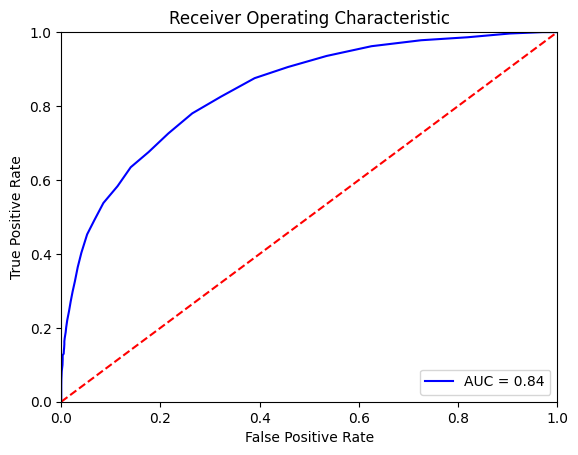

In [27]:
fpr, tpr, threshold = metrics.roc_curve(y_train, probs_train[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# plot curve roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.8151760799449156


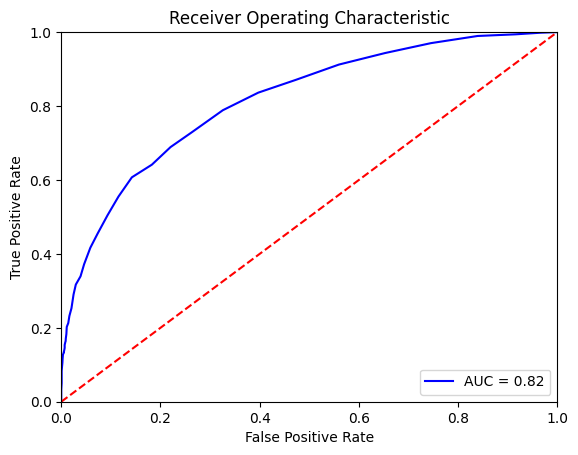

In [28]:
fpr, tpr, threshold = metrics.roc_curve(y_test, probs_test[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# plot curve roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Confusion Matrix

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

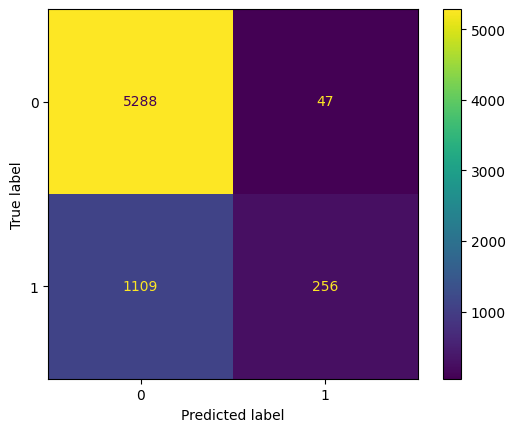

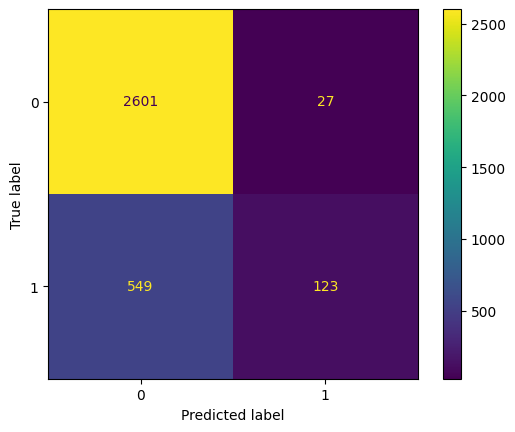

In [30]:
# Train
cfm = confusion_matrix(y_train, y_pred_train) # ()
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()

# Test
cfm = confusion_matrix(y_test, y_pred_test) # ()
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()

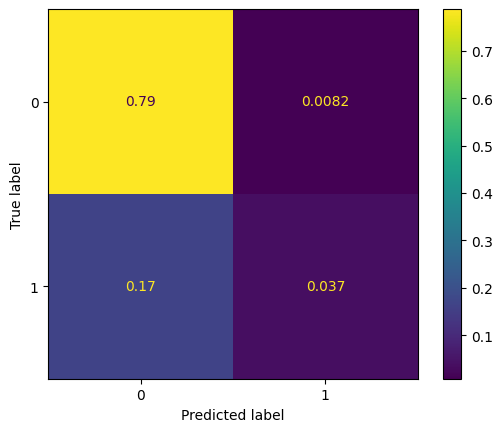

In [31]:
### Normalizada
cfm = confusion_matrix(y_test, y_pred_test, normalize="all") # tambien podemos normalizar la matriz
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model_LogReg = LogisticRegression(solver='liblinear') # el solver el tipo de gradientes, tendremos diferentes
model_LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [54]:
model_LogReg.coef_

array([[-5.11910300e-03,  4.54537554e-02,  3.47443264e-06,
        -2.94818580e-04, -2.02649410e-03, -1.35516150e-06,
         1.27338169e-03, -5.19562470e-04, -1.45448557e-03,
        -3.07967112e-03,  9.46079671e-04,  2.55768567e-04,
         2.31144326e-05, -1.27915367e-04, -2.17727596e-06,
        -6.58460977e-05, -2.30876110e-05, -1.42035407e-05,
        -1.41277061e-04, -1.41314303e-04,  1.63276437e-04,
         1.45330407e-05]])

In [55]:
y_pred_test = model_LogReg.predict(X_test) # # la y_predicha viene de las probabilidades y escogiendo directamente el threshold como 0.5
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
probs = model_LogReg.predict_proba(X_test) # si quieremos establecer threshold, nos da las probabilidades en forma de array
probs # [probabilidad de 0, probabilidad de 1]
(probs[:,1]>0.5) # establecemos el threshold para que sea 1
(probs[:,1]>0.5)*1 # con esto lo convertimos a tipo int

array([0, 0, 0, ..., 0, 0, 0])

### Métricas

In [57]:
#es mejor calcular accuracy_score, ya que le pasamos y_test con Y_pred

# Train
y_pred_train=model_LogReg.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
# Test
y_pred_test = model_LogReg.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.7916417910447762
0.7863636363636364


### Confusion Matrix

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

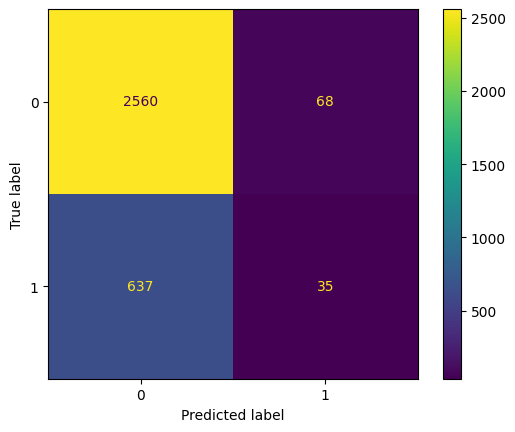

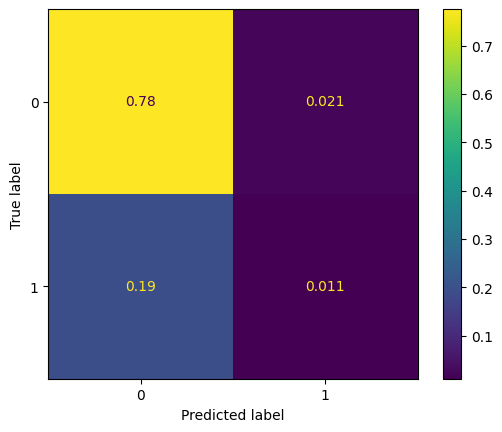

In [59]:
cfm = confusion_matrix(y_test, y_pred_test) # ()
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()

### Normalizada
cfm = confusion_matrix(y_test, y_pred_test, normalize="all") # tambien podemos normalizar la matriz
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()

### ROC Curve

0.6752216855309638


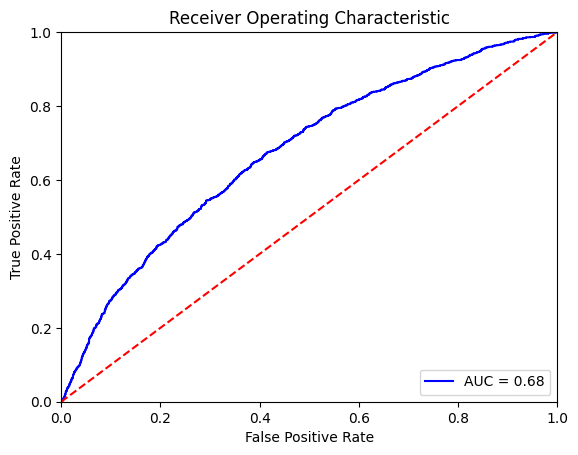

In [60]:
# devuelve la evolucion de:
# false-positive-rate de forma creciente (1-sensitivity)
# True-positive-rate de forma creciente (Sensitivity)
# threshold de forma decreciente
probs_train=model_LogReg.predict_proba(X_train) # calculamos las probabilidades (predicción)
fpr, tpr, threshold = metrics.roc_curve(y_train, probs_train[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# plot curve roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.6659435701601797


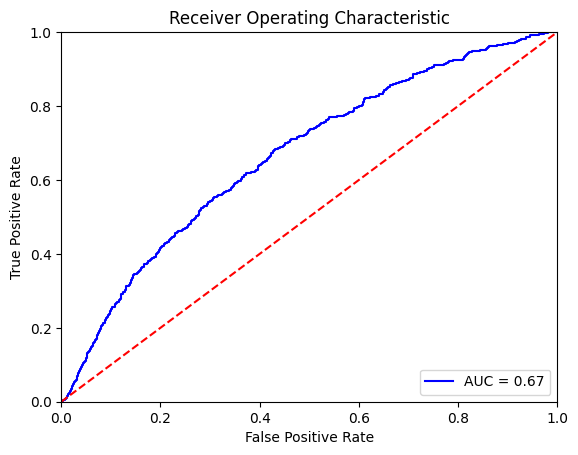

In [61]:
probs_test=model_LogReg.predict_proba(X_test) # calculamos las probabilidades (predicción)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs_test[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# plot curve roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Model Classification Report

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(f"Model Classification Report : \n{classification_report(y_test, y_pred_test)}")

Model Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2628
           1       0.34      0.05      0.09       672

    accuracy                           0.79      3300
   macro avg       0.57      0.51      0.48      3300
weighted avg       0.71      0.79      0.72      3300



### Logit Regression Results (p-values)

In [64]:
import statsmodels.api as sm
X_test_logit = X_test.copy()
X_test_logit=sm.add_constant(X_test_logit)
logit_model=sm.Logit(y_test, X_test_logit)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.371652
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3300
Model:                          Logit   Df Residuals:                     3277
Method:                           MLE   Df Model:                           22
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                  0.2646
Time:                        17:05:27   Log-Likelihood:                -1226.5
converged:                      False   LL-Null:                       -1667.8
Covariance Type:            nonrobust   LLR p-value:                1.624e-172
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4869      0.475     -5.232      0.000      -3.419      -1.555
credit_score         -0.0003      0.001     

### Grid Search

In [65]:
model_LogReg = LogisticRegression()
model_LogReg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
params = {'solver':['liblinear']}
scoring = ['accuracy']
grid_solver = GridSearchCV(estimator = model_LogReg, # model to train
                   param_grid = params,
                   scoring = scoring,
                   cv = 5,
                   n_jobs=-1,
                   refit='accuracy',
                   verbose = 2)

model_result_LogReg = grid_solver.fit(X_train,y_train) # generamos las combinaciones

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [67]:
model_result_LogReg.best_estimator_

LogisticRegression(solver='liblinear')

In [68]:
print("Train")
y_pred_train=model_result_LogReg.predict(X_train)
print("Accuracy:", accuracy_score(y_train,y_pred_train))
probs_train=model_result_LogReg.predict_proba(X_train)
print("Train AUC:", roc_auc_score(y_train,probs_train[:,1]))

print("Test")
y_pred_test=model_result_LogReg.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred_test))
probs_test=model_result_LogReg.predict_proba(X_test)
print("Train AUC:", roc_auc_score(y_test,probs_test[:,1]))

Train
Accuracy: 0.7916417910447762
Train AUC: 0.6752216855309638
Test
Accuracy: 0.7863636363636364
Train AUC: 0.6659435701601797


In [69]:
best_model = model_result_LogReg.best_estimator_
best_model
final_model = best_model.fit(X,y) #hacemos el fit de los datos con el mejor modelo

In [70]:
y_test = final_model.predict(X_test)

## Decision Tree Classifier (CART)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn

In [72]:
from sklearn.tree import DecisionTreeClassifier # predict roba
from sklearn.tree import DecisionTreeRegressor 

In [73]:
# especificando el modelo
model_tree = DecisionTreeClassifier()
model_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [74]:
params={'min_samples_leaf': 10}
model_tree.set_params(**params)

DecisionTreeClassifier(min_samples_leaf=10)

In [75]:
tree_model=model_tree.fit(X_train,y_train)

In [76]:
##### no usar score
print("Train score", tree_model.score(X_train,y_train))
print("Test score", tree_model.score(X_test, y_test))
# train
y_pred=tree_model.predict(X_train)
probs=tree_model.predict_proba(X_train)
print("Train AUC", sklearn.metrics.roc_auc_score(y_train, probs[:,1]))
print("Train Accuracy", sklearn.metrics.accuracy_score(y_train,y_pred))
# test
y_pred=tree_model.predict(X_test)
probs=tree_model.predict_proba(X_test)
print("Test AUC", sklearn.metrics.roc_auc_score(y_test, probs[:,1]))
print("Test Accuracy",  sklearn.metrics.accuracy_score(y_test,y_pred))

Train score 0.8858208955223881
Test score 0.8469696969696969
Train AUC 0.9425389730544369
Train Accuracy 0.8858208955223881
Test AUC 0.7280294803761733
Test Accuracy 0.8469696969696969


### Grid Search

In [78]:
params = {'ccp_alpha': [0.0, 0.1], 
          'class_weight': [None], 
          'criterion': ['gini'], 
          'max_depth': [4, 6], 
          'max_features': [None], 
          'max_leaf_nodes': [None], 
          'min_impurity_decrease': [0.0, 0.1], 
          'min_samples_leaf': [10, 15], 
          'min_samples_split': [25 , 40], 
          'min_weight_fraction_leaf': [0.0], 
          'monotonic_cst': [None], 
          'random_state': [None], 
          'splitter': ['best']}

# de aquí seleccionamos lo que queremos modificar, ponemos siempre listas

params = {'max_depth': [4, 6], 
          'min_impurity_decrease': [0.0, 0.1], 
          'min_samples_leaf': [10, 15], 
          'min_samples_split': [25 , 40], 
         }

In [79]:
# =============================================================================
# Building a tree decision model
# =============================================================================
# especificando el modelo
model_tree = DecisionTreeClassifier()

# vemos los parametros que puede tener
print(model_tree.get_params())
params={'max_depth': [5],# Maxima pofundidad del arbol #5
        'max_leaf_nodes': [10,15,20], # maximo de hojas del arbol #3
        'min_impurity_decrease' : [0.01, 0.02],#2 # un nuevo nodo se harà si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [10,20], ##4 The minimum number of samples required to split an internal node:
        'ccp_alpha': [0.0,0.01]#2 #240
        }

# scoring: lista de metricas a obtener
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = ['accuracy', 'roc_auc']

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [80]:
# CV (cross validación)
n_cv=5 # 5 folds
# creamos la GridSeacrh # cross-validation
grid_solver = GridSearchCV(estimator = model_tree, # model to train
                   param_grid = params, # param_grid
                   scoring = scoring,
                   cv = n_cv,
                   refit = 'accuracy', # cuando tienes mas de un score para tener un criterio de cual es el mejor modelo
                   verbose = 2)

## el refit es la que elige el mejor modelo


model_result = grid_solver.fit(X_train,y_train)
# hemos ajustado el modelo

# best score es la media del best estimator
print("Mejor score:", model_result.best_score_)
# tenemos los mejores parametros
print("Mejores parametros:",model_result.best_params_)

# En este caso el score devuelve el roc_auc
print("Train Score:", model_result.score(X_train,y_train)) # score devulve la metrica del refit
print("Test Score:", model_result.score(X_test,y_test))
# Train
y_pred=model_result.predict(X_train)
probs=model_result.predict_proba(X_train)
print("Train AUC:", sklearn.metrics.roc_auc_score(y_train,probs[:,1]))
print("Train Accuracy:", sklearn.metrics.accuracy_score(y_train,y_pred))

# test
model_result.score(X_test,y_test)
y_pred=model_result.predict(X_test)
probs=model_result.predict_proba(X_test)
print("Test AUC:", sklearn.metrics.roc_auc_score(y_test,probs[:,1]))
print("Test Accuracy:", sklearn.metrics.accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_imp

In [81]:
# tenemos un atributo del mejor modelo
best_model
best_model=model_result.best_estimator_

# nos quedamos con el mejor modelo y reestimamos con toda la muestra
final_model=best_model.fit(X,y)

### Importancia de variables

In [82]:
final_model.feature_importances_


importances=pd.DataFrame([X.columns,final_model.feature_importances_], index=["feature","importance"]).T
print(importances.sort_values("importance", ascending = False).head(10))

              feature importance
1                 age   0.554146
9   products_number_2   0.283735
4       active_member   0.162118
0        credit_score        0.0
13           tenure_2        0.0
20           tenure_9        0.0
19           tenure_8        0.0
18           tenure_7        0.0
17           tenure_6        0.0
16           tenure_5        0.0


In [83]:
#resultados de la cross validation con parameter tunning
results=model_result.cv_results_
results=pd.DataFrame(results)

In [84]:
results.head()
results.head(2).T

,0,1
mean_fit_time,0.015,0.011605
std_fit_time,0.002279,0.001005
mean_score_time,0.009199,0.006803
std_score_time,0.001163,0.000719
param_ccp_alpha,0.0,0.0
param_max_depth,5,5
param_max_leaf_nodes,10,10
param_min_impurity_decrease,0.01,0.01
param_min_samples_split,10,20
params,"{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n...","{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n..."


In [85]:
results[["mean_test_roc_auc", 'params', 'param_min_samples_split']]

,mean_test_roc_auc,params,param_min_samples_split
0,0.718711,"{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n...",10
1,0.718711,"{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n...",20
2,0.683372,"{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n...",10
3,0.683372,"{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n...",20
4,0.718711,"{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n...",10
5,0.718711,"{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n...",20
6,0.683372,"{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n...",10
7,0.683372,"{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n...",20
8,0.718711,"{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n...",10
9,0.718711,"{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n...",20


### Ploteo de resultados en función de parámetros

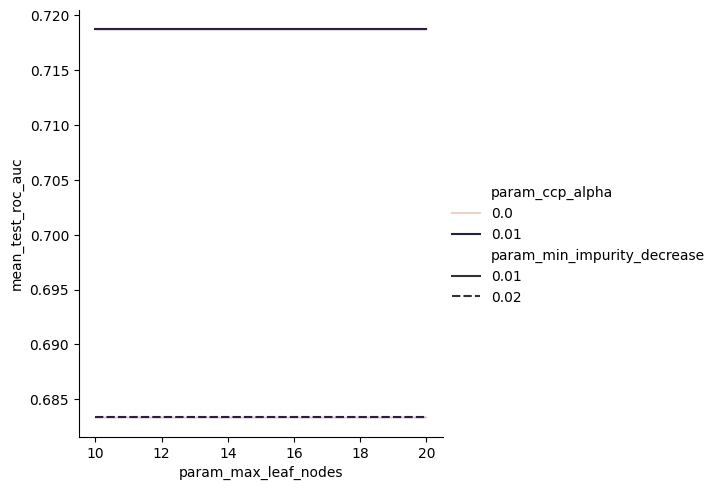

In [86]:
sns.relplot(x="param_max_leaf_nodes", 
            y="mean_test_roc_auc", 
            hue="param_ccp_alpha", # colores
            style="param_min_impurity_decrease",
            kind = "line", data=results)

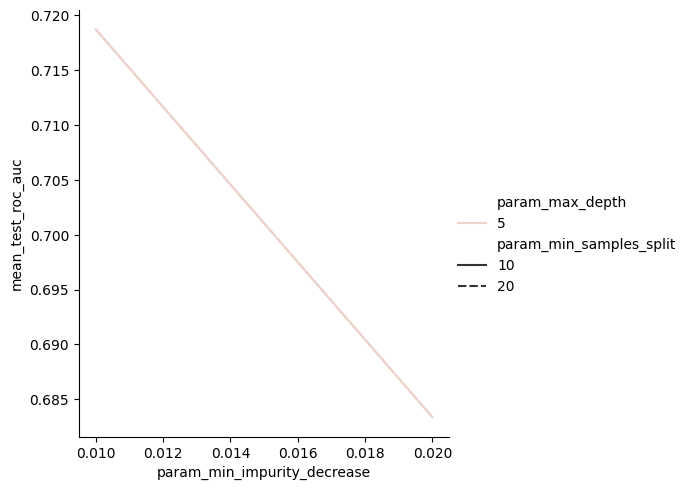

In [87]:
sns.relplot(x="param_min_impurity_decrease", 
            y="mean_test_roc_auc", 
            hue="param_max_depth", # colores
            style="param_min_samples_split",
            kind = "line", data=results)

## Ensembling

### Voting

In [88]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [89]:
from sklearn.ensemble import VotingClassifier

model1=LogisticRegression()
model2=SVC(probability=True)
model3=RandomForestClassifier()

In [90]:
voting_model = VotingClassifier (
    estimators=[("Logística", model1),
               ("SV Machine", model2),
               ("RandomForest", model3)],
    voting="soft")
voting_model = voting_model.fit(X_train, y_train)

In [91]:
voting_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
voting_model.get_params()

{'estimators': [('Logística', LogisticRegression()),
  ('SV Machine', SVC(probability=True)),
  ('RandomForest', RandomForestClassifier())],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'soft',
 'weights': None,
 'Logística': LogisticRegression(),
 'SV Machine': SVC(probability=True),
 'RandomForest': RandomForestClassifier(),
 'Logística__C': 1.0,
 'Logística__class_weight': None,
 'Logística__dual': False,
 'Logística__fit_intercept': True,
 'Logística__intercept_scaling': 1,
 'Logística__l1_ratio': None,
 'Logística__max_iter': 100,
 'Logística__multi_class': 'deprecated',
 'Logística__n_jobs': None,
 'Logística__penalty': 'l2',
 'Logística__random_state': None,
 'Logística__solver': 'lbfgs',
 'Logística__tol': 0.0001,
 'Logística__verbose': 0,
 'Logística__warm_start': False,
 'SV Machine__C': 1.0,
 'SV Machine__break_ties': False,
 'SV Machine__cache_size': 200,
 'SV Machine__class_weight': None,
 'SV Machine__coef0': 0.0,
 'SV Machine__decision_funct

In [93]:
y_pred_test = voting_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))

Accuracy: 0.9306060606060607


In [94]:
voting_model.predict_proba(X_test)

array([[0.74515654, 0.25484346],
       [0.87569886, 0.12430114],
       [0.82458378, 0.17541622],
       ...,
       [0.90939433, 0.09060567],
       [0.88440232, 0.11559768],
       [0.91959871, 0.08040129]])

### Stacking

In [95]:
from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [96]:
model1=RandomForestClassifier(n_estimators=10, random_state=42)
model2=make_pipeline(StandardScaler(), SVC(random_state=42, probability=True)) #con el pipeline lo que hacemos es que primero estandarice y luego aplique el modelo

In [97]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True, random_state=42))])

In [98]:
yhat1=model1.predict_proba(X_train)[:,1]
yhat2=model2.predict_proba(X_train)[:,1]

In [99]:
y_predichas=pd.DataFrame({'yhat1':yhat1,'yhat2':yhat2})

In [100]:
final_estimator=LogisticRegression()
final_estimator.fit(y_predichas, y_train)

LogisticRegression()

In [101]:
estimators = [("rf", model1), ("svr", model2)]

In [102]:
stacking_model = StackingClassifier (estimators=estimators,
                          final_estimator=LogisticRegression())

stacking_model.fit(X_train, y_train)
stacking_model.score(X_test, y_test)

0.8751515151515151

In [103]:
stacking_model.final_estimator_.coef_

array([[2.85393444, 3.1116646 ]])

### Bagging

In [104]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

from sklearn.preprocessing import scale

In [105]:
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier()

In [106]:
bagging_model.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [107]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [108]:
bagging = BaggingClassifier(estimator=KNeighborsClassifier(10), n_estimators=10, max_samples=0.5, max_features=0.5)

In [109]:
bagging.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 10,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(n_neighbors=10),
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [110]:
params={'estimator__n_neighbors': [5,10],
         'n_estimators': [10,20]}

scoring = ['accuracy', 'roc_auc']

# creamos la GridSeacrh
grid_solver_bagging = GridSearchCV(estimator = bagging, # model to train
                   param_grid = params, # param_grid
                   scoring = scoring,
                   cv = 5,
                   refit = 'accuracy',
                   verbose = 1)

grid_solver_bagging.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=10),
                                         max_features=0.5, max_samples=0.5),
             param_grid={'estimator__n_neighbors': [5, 10],
                         'n_estimators': [10, 20]},
             refit='accuracy', scoring=['accuracy', 'roc_auc'], verbose=1)

In [111]:
# En este caso el score devuelve el roc_auc
print("Train Score:", grid_solver_bagging.score(X_train,y_train)) # score devulve la metrica del refit
print("Test Score:", grid_solver_bagging.score(X_test,y_test))
# Train
y_pred_train=grid_solver_bagging.predict(X_train)
probs_train=grid_solver_bagging.predict_proba(X_train)
print("Train AUC:", sklearn.metrics.roc_auc_score(y_train,probs_train[:,1]))
print("Train Accuracy:", sklearn.metrics.accuracy_score(y_train,y_pred_train))

# test
y_pred_test=grid_solver_bagging.predict(X_test)
probs_test=grid_solver_bagging.predict_proba(X_test)
print("Test AUC:", sklearn.metrics.roc_auc_score(y_test,probs_test[:,1]))
print("Test Accuracy:", sklearn.metrics.accuracy_score(y_test,y_pred_test))

Train Score: 0.7997014925373135
Test Score: 0.9669696969696969
Train AUC: 0.83244054914158
Train Accuracy: 0.7997014925373135
Test AUC: 0.643618780568475
Test Accuracy: 0.9669696969696969


#### Bagging Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
bagging_trees = BaggingClassifier(DecisionTreeClassifier(), n_estimators=20, max_samples=0.5, max_features=0.5)
bagging_trees.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [113]:
params={ 'estimator__max_depth': [5],
        'estimator__max_features': [0.3,0.5],
 'n_estimators': [20]}

In [114]:
scoring = ['accuracy', "roc_auc"]

# creamos la GridSeacrh
grid_solver_trees = GridSearchCV(estimator = bagging_trees, # model to train
                   param_grid = params, # param_grid
                   scoring = scoring,
                   cv = 5,
                   refit = 'accuracy',
                   verbose = 1)

In [115]:
grid_solver_trees.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         max_features=0.5, max_samples=0.5,
                                         n_estimators=20),
             param_grid={'estimator__max_depth': [5],
                         'estimator__max_features': [0.3, 0.5],
                         'n_estimators': [20]},
             refit='accuracy', scoring=['accuracy', 'roc_auc'], verbose=1)

In [116]:
print("Train Score:", grid_solver_trees.score(X_train,y_train)) # score devulve la metrica del refit
print("Test Score:", grid_solver_trees.score(X_test,y_test))
# Train
y_pred_train=grid_solver_trees.predict(X_train)
probs_train=grid_solver_trees.predict_proba(X_train)
print("Train AUC:", sklearn.metrics.roc_auc_score(y_train,probs_train[:,1]))
print("Train Accuracy:", sklearn.metrics.accuracy_score(y_train,y_pred_train))

# test
y_pred_test=grid_solver_trees.predict(X_test)
probs_test=grid_solver_trees.predict_proba(X_test)
print("Test AUC:", sklearn.metrics.roc_auc_score(y_test,probs_test[:,1]))
print("Test Accuracy:", sklearn.metrics.accuracy_score(y_test,y_pred_test))

Train Score: 0.8262686567164179
Test Score: 0.943030303030303
Train AUC: 0.8736577511835244
Train Accuracy: 0.8262686567164179
Test AUC: 0.7783717887551916
Test Accuracy: 0.943030303030303


#### Random Forest

In [117]:
model_RF = RandomForestClassifier()
params = {'criterion': ['entropy', 'gini'], 
          'max_depth': [5, 7], 
          'max_features': [0.3, 0.7], #sirve para no seleccionar todas las columnas
          'max_samples': [0.8, 0.5], #sirve para no seleccionar todas las filas
          'max_leaf_nodes': [10, 30], 
          'min_impurity_decrease': [0.05], 
          'min_samples_split': [5, 10], 
          'n_estimators': [100] }

In [118]:
# scoring: lista de metricas a obtener
scoring = ['accuracy', "roc_auc"]

# creamos la GridSeacrh
n_cv=3
grid_solver = GridSearchCV(estimator = model_RF, # model to train
                           param_grid = params, # param_grid
                           scoring = scoring,
                           cv = n_cv,
                           refit = 'roc_auc',
                           verbose = 1) # cuanto va a imprimir por pantalla

In [119]:
# entrenamos
model_result_RF = grid_solver.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [120]:
model_result_RF.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.3,
                       max_leaf_nodes=30, max_samples=0.5,
                       min_impurity_decrease=0.05, min_samples_split=10)

In [121]:
print("Train")
y_pred_train=model_result_RF.predict(X_train)
print("Accuracy:", accuracy_score(y_train,y_pred_train))
probs_train=model_result_RF.predict_proba(X_train)
print("Train AUC:", roc_auc_score(y_train,probs_train[:,1]))

print("Test")
y_pred_test=model_result_RF.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred_test))
probs=model_result_RF.predict_proba(X_test)
print("Train AUC:", roc_auc_score(y_test,probs_test[:,1]))

Train
Accuracy: 0.7962686567164179
Train AUC: 0.7883686073376794
Test
Accuracy: 0.9675757575757575
Train AUC: 0.7783717887551916


### Boosting

#### AdaBoost

In [122]:
from sklearn.ensemble import AdaBoostClassifier

In [123]:
AdaBoost_model = AdaBoostClassifier(n_estimators=10, learning_rate=0.1)
AdaBoost_model.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.1, n_estimators=10)

In [124]:
y_pred_train=AdaBoost_model.predict(X_train)
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
probs_train=AdaBoost_model.predict_proba(X_train)
print("Train AUC:", roc_auc_score(y_train,probs_train[:,1]))
y_pred_test=AdaBoost_model.predict(X_test)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))
probs_test=AdaBoost_model.predict_proba(X_test)
print("Train AUC:", roc_auc_score(y_test,probs_test[:,1]))


Train Accuracy 0.7962686567164179
Train AUC: 0.7917744111558546
Test Accuracy 0.9675757575757575
Train AUC: 0.8640176671515669


In [125]:
AdaBoost_model.get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 10,
 'random_state': None}

#### Gradient Boosting (GB)

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
GradientBoost_model = GradientBoostingClassifier(learning_rate=0.05,
                                  n_estimators=100,
                                  tol=0.0001, #parametros propios del boosting, a partir de aquí del arbol
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,
                                  max_depth=3,
                                  random_state=None,
                                  max_features=None)
GradientBoost_model.fit(X_train, y_train)
y_pred_test = GradientBoost_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred_test))

Accuracy:  0.8803030303030303


#### XGBoost

In [128]:
import xgboost as xgb
from xgboost import XGBClassifier

xgbmodel = XGBClassifier()
xgbmodel.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [129]:
params={'objective': ['binary:logistic'],
    'base_score': [0.5], # prediccion inicial
     'booster': ['gbtree'], # (gbtree, gblinear, dart)
     'colsample_bylevel': [1], # ratio de columnas en cada nivel
     'colsample_bytree': [0.7], # ratio de columnas por tree
     'gamma': [0.01],    # minimo "loss" reduccion para crear un nuevo split. Larger-> conservative
     'learning_rate': [0.1], # (eta) aportacion de cada arbol al modelo
     'max_depth': [3,5], # maxima profundidad en cada arbol
     'min_child_weight': [1], # minimo numero samples por hoja
    #'missing': [1], # si queremos reemplazar los missings por un numero
     'n_estimators': [100,150,200,300,500], # numero de arboles
     'n_jobs': [-1], # trabajos en paralelo
     'random_state': [0], # seed para generar los folds
     'reg_alpha': [0.1], # L1 regularitacion
     'reg_lambda': [0.01,0.1], # L2 regularitacion
     # 'scale_pos_weight': [1],
     'subsample': [0.8, 0.9]} # ratio de muestras por cada arbol

In [130]:
scoring = ['accuracy']
grid_solver = GridSearchCV(estimator = xgbmodel, # model to train
                   param_grid = params,
                   scoring = scoring,
                   cv = 5,
                   n_jobs=-1,
                   refit='accuracy',
                   verbose = 2)

model_result_xgboost = grid_solver.fit(X_train,y_train) # generamos las combinaciones

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [131]:
print("Train")
y_pred_train=model_result_xgboost.predict(X_train)
print("Accuracy:", accuracy_score(y_train,y_pred_train))
probs_train=model_result_xgboost.predict_proba(X_train)
print("Train AUC:", roc_auc_score(y_train,probs_train[:,1]))

print("Test")
y_pred_test=model_result_xgboost.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred_test))
probs_test=model_result_xgboost.predict_proba(X_test)
print("Train AUC:", roc_auc_score(y_test,probs_test[:,1]))

Train
Accuracy: 0.8782089552238806
Train AUC: 0.9009388549594737
Test
Accuracy: 0.8636363636363636
Train AUC: 0.6900199326213006


In [132]:
best_model = model_result_xgboost.best_estimator_
best_model
final_model = best_model.fit(X,y) #hacemos el fit de los datos con el mejor modelo

In [133]:
final_model.feature_importances_
importances=pd.DataFrame([X.columns,final_model.feature_importances_], index=["feature","importance"]).T
print(importances.sort_values("importance", ascending = False).head(15))

              feature importance
9   products_number_2   0.210241
10  products_number_3    0.14048
1                 age   0.127431
4       active_member    0.11729
6     country_Germany   0.082811
11  products_number_4   0.055684
2             balance   0.040076
8         gender_Male    0.03766
7       country_Spain   0.020365
0        credit_score   0.017085
12           tenure_1   0.016002
20           tenure_9   0.015951
5    estimated_salary   0.015889
13           tenure_2    0.01548
16           tenure_5   0.013943
